# Tutorial

## Author: Jisheng Zhang

This tutorial provides an example simulation by CMAPPER (based on the code developed by `Zhang & Rogers 2022`). CMAPPER is a 1D code to simulate thermal evolution of rocky planets, assuming an arbitrary hot initial state (fully melted Fe core and magma ocean) upon differentiation. The simulation with the default combination of parameters (values provided in `input.txt`) should output the same result as what is shown in this notebook.

The notebook also provides routines users can adopt or modify to visualize the output. These routines can also be found in the file `test.py`, in which we use some of the routines to generate plots and movies saved in the folder `image` and `movie`.

#### All units are in SI unit unless otherwise noted

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-v0_8')
import numpy as np

In [4]:
# save_t is a list of timesteps in years at which 
# planet thermal and structural profiles are saved
# in the following folder:
# '/results_Mpl#_CMF#_time#_Qrad#_#_#_#_Teq#'  
# with # being values in the file `input.txt`for
# the variable preceding them

save_t=[1.0]
for i in range(1,182):
    if save_t[i-1]<5000.0:
        save_t.append(save_t[i-1]+80.0)
    elif save_t[i-1]<1e8 and save_t[i-1]>=5000.0:
        save_t.append(save_t[i-1]+int(save_t[i-1]/3.0))
    elif save_t[i-1]>=1e8 and save_t[i-1]<1e9:
        save_t.append(save_t[i-1]+int(save_t[i-1]/10.0))
    else:
        save_t.append(save_t[i-1]+int(save_t[i-1]/25.0))

In [47]:
save_t_title=save_t.copy()
t_title=[]
for i in range(len(save_t)):
    if save_t[i]<100.0 and save_t[i]>1.0:
        save_t_title[i]=save_t_title[i]-1.0
    elif save_t[i]>=100.0 and save_t[i]<10000.0:
        round_value=round(save_t[i], -2)
        save_t_title[i]=round_value
    else:
        round_value=round(save_t[i], -len(str(int(save_t[i])))+2)
        save_t_title[i]=round_value

    if save_t_title[i]<1000.0:
        if save_t[i]==1.0:
            t_title.append('time: '+str(int(save_t_title[i]))+' year')
        t_title.append('time: '+str(int(save_t_title[i]))+' years')
    elif save_t_title[i]>=1000.0 and save_t_title[i]<1000000.0:
        t_title.append('time: '+str((save_t_title[i])/1000.0)+' kyr')
    elif save_t_title[i]>=1000000.0 and save_t_title[i]<1000000000.0:
        t_title.append('time: '+str((save_t_title[i])/1000000.0)+' Myr')
    elif save_t_title[i]>=1000000000.0 and save_t_title[i]<1000000000000.0:
        t_title.append('time: '+str((save_t_title[i])/1000000000.0)+' Gyr')
    st=t_title[i]
    if len(t_title[i])==11:
        t_title[i]='  '+st
    elif len(t_title[i])==12:
        t_title[i]=' '+st

In [216]:
def f_axis_max_min(v_min,v_max,axis_scale):
    if axis_scale=='log':
        v_max=np.log10(v_max)
        v_min=np.log10(v_min)
        dv=np.abs(v_max-v_min)/10.0
        v_max=10.0**(v_max+dv)
        v_min=10.0**(v_min-dv)
    else:
        dv=np.abs(v_max-v_min)/10.0
        v_max=v_max+dv
        v_min=v_min-dv
    return v_min,v_max

In [210]:
s=np.loadtxt(results_foldername+'/profile/StructureProfile_'+str(int(save_t[0]))+'.txt')
T_max=max(s[:,4])#+max(s[:,4])*0.01
R_max=max(s[:,0])#+max(s[:,0])*0.01
Fconv_max=max(s[:,7][5:-2])#+max(s[:,7][5:-2])*0.01
eta_min=min(s[:,12]+1e-7)
g_min=min(s[:,3])
rho_min=min(s[:,2])

s=np.loadtxt(results_foldername+'/profile/StructureProfile_'+str(int(save_t[-1]))+'.txt')
T_min=min(s[:,4])#-50.0
P_max=max(s[:,1])/1e9#+max(s[:,1])/1e11
P_min=1e5/1e9
rho_max=max(s[:,2])#+max(s[:,2])*0.01
g_max=max(s[:,3])#+max(s[:,3])*0.01
vconv_min=min(s[:,10][5:-2]+1e-7)
eta_max=max(s[:,12])#+max(s[:,12])*0.01
Rem_min=min(s[:,11]+1e-3)
R_min=min(s[:,0])
Fconv_min=min(s[:,7][5:-2]+1e-7)

s=np.loadtxt(results_foldername+'/profile/StructureProfile_'+str(int(save_t[1]))+'.txt')
Rem_max=max(s[:,11])#+max(s[:,11])*0.01
vconv_max=max(s[:,10][5:-2])#+max(s[:,10][5:-2])*0.01

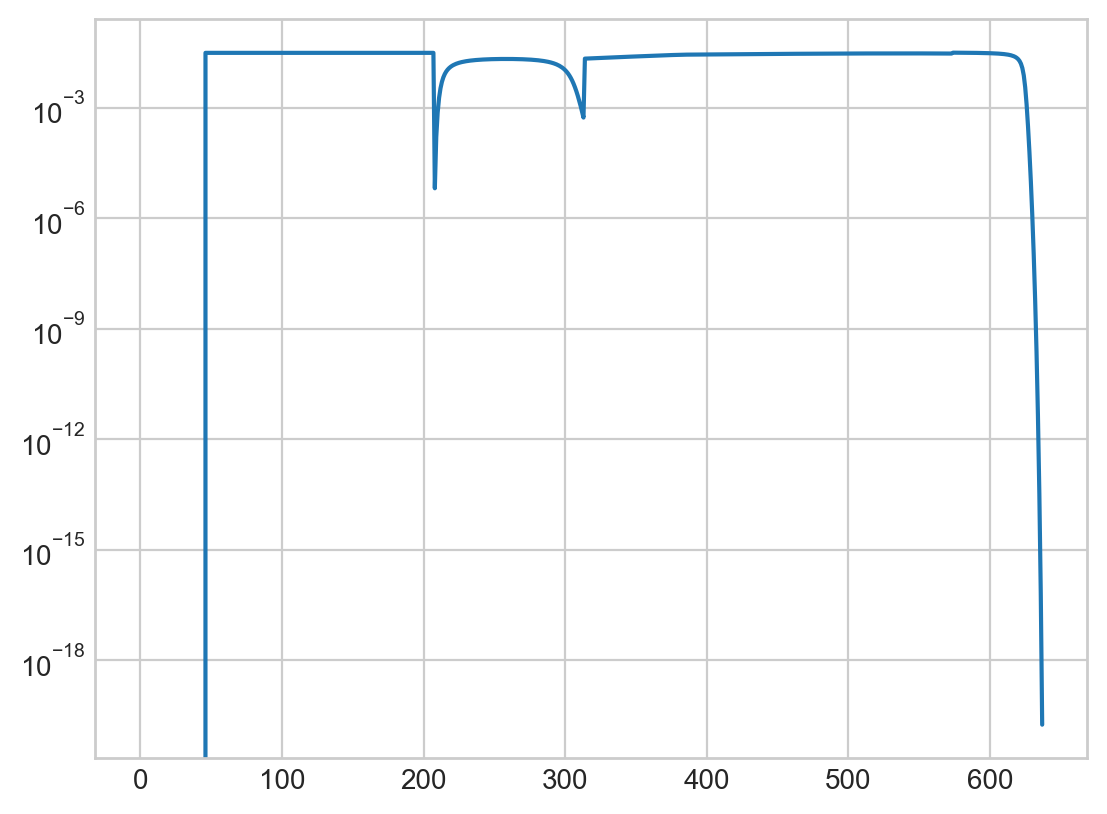

In [255]:
s=np.loadtxt(results_foldername+'/profile/StructureProfile_'+str(int(save_t[-1]))+'.txt')
plot(s[:,7][:-2])
plt.yscale('log')
#plot(s[:,8])

In [258]:
s[:,7][40:50]
solid_core_index=0
for j in range(int(core_zone-1)):
    if s[:,8][j]>0 and s[:,8][j+1]==0.0:
        solid_core_index=j
print(solid_core_index)

45


In [259]:
s[:,7][45:50]

array([0.        , 0.03103467, 0.03103467, 0.03103467, 0.03103467])

In [248]:
for i in range(len(s[:,8])):
    if s[:,8][i]==0:
        print(i)

46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207


In [250]:
s[:,11][206:210]

array([15581.64400925, 15633.7000909 ,     0.        ,     0.        ])

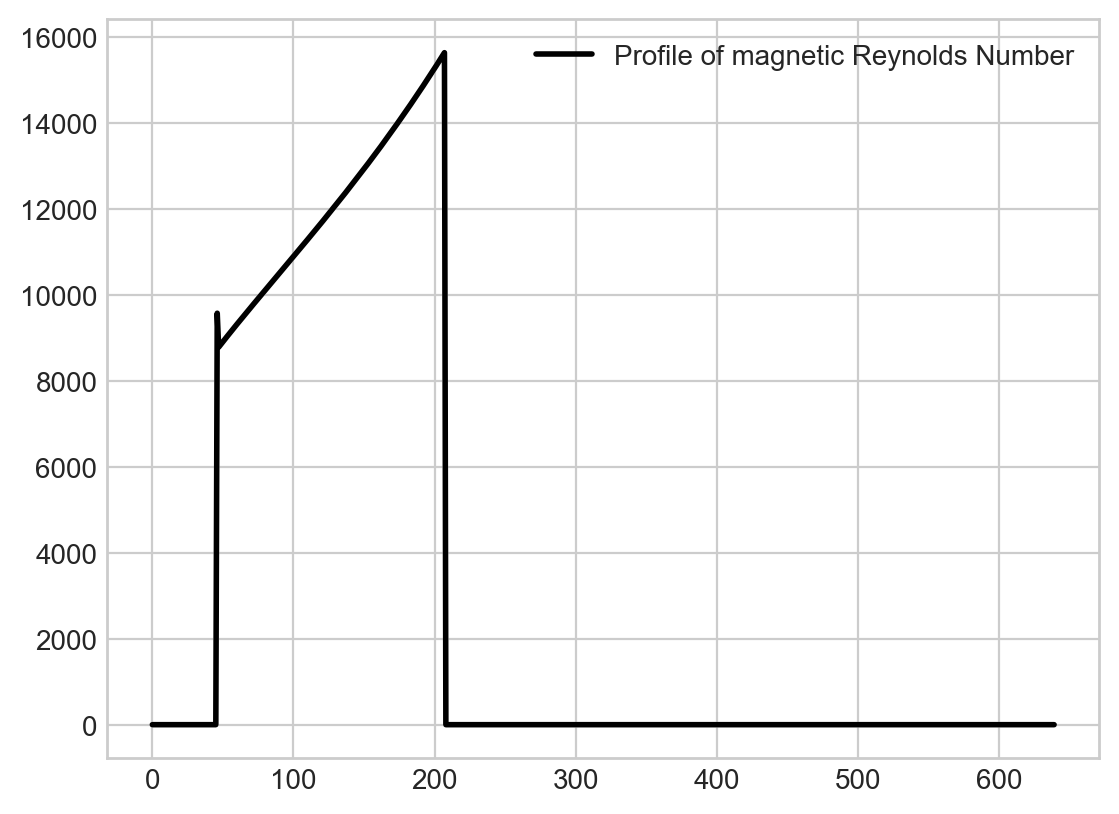

In [251]:
plot(s[:,11],color='white',linewidth=2.0)
plot(s[:,11],color='black',linewidth=2.0,label='Profile of magnetic Reynolds Number')
plt.legend()

In [237]:
previous=np.loadtxt(results_foldername+'/profile/t0/previous0.txt')
core_zone=previous[-2]
print(core_zone)


208.0



In [243]:
for i in range(int(core_zone-1)):
    if s[:,8][i]>0 and s[:,8][i+1]==0.0:
        print(i)

45


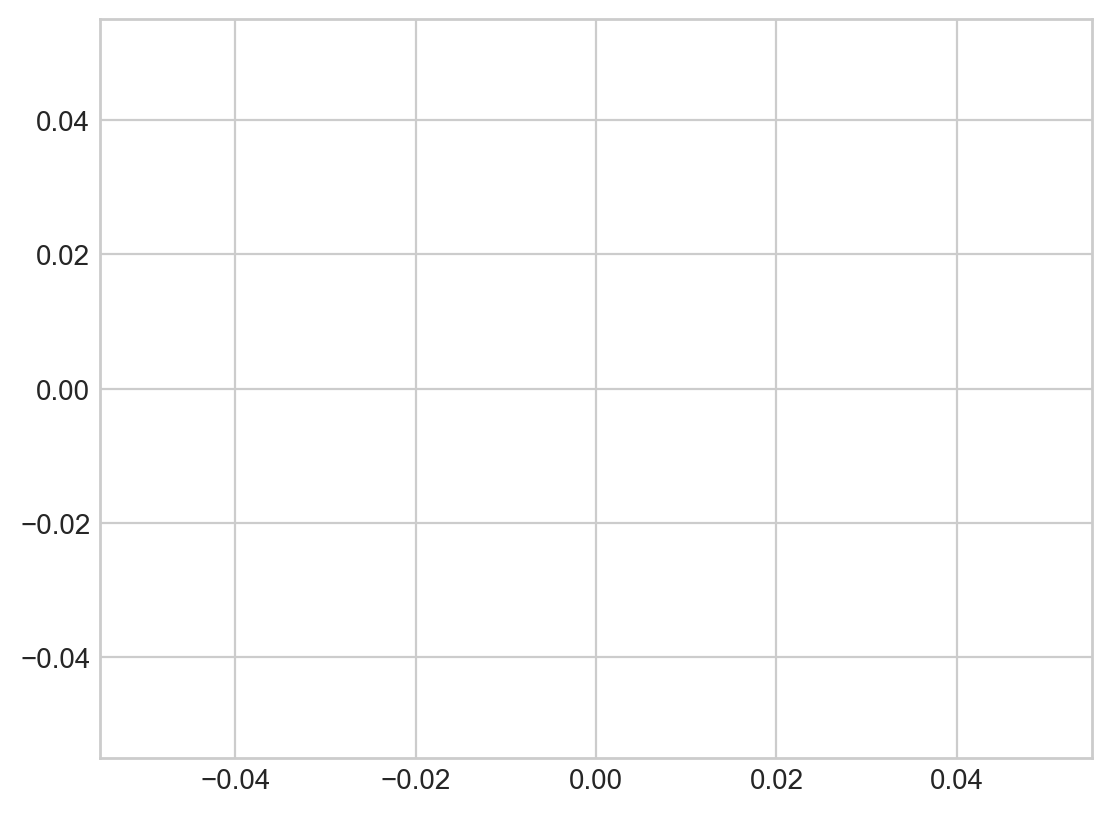

In [244]:
plot(s[:,8][:0],linestyle='dashed',color='royalblue',linewidth=1.5,label='Core conductive heat flux')

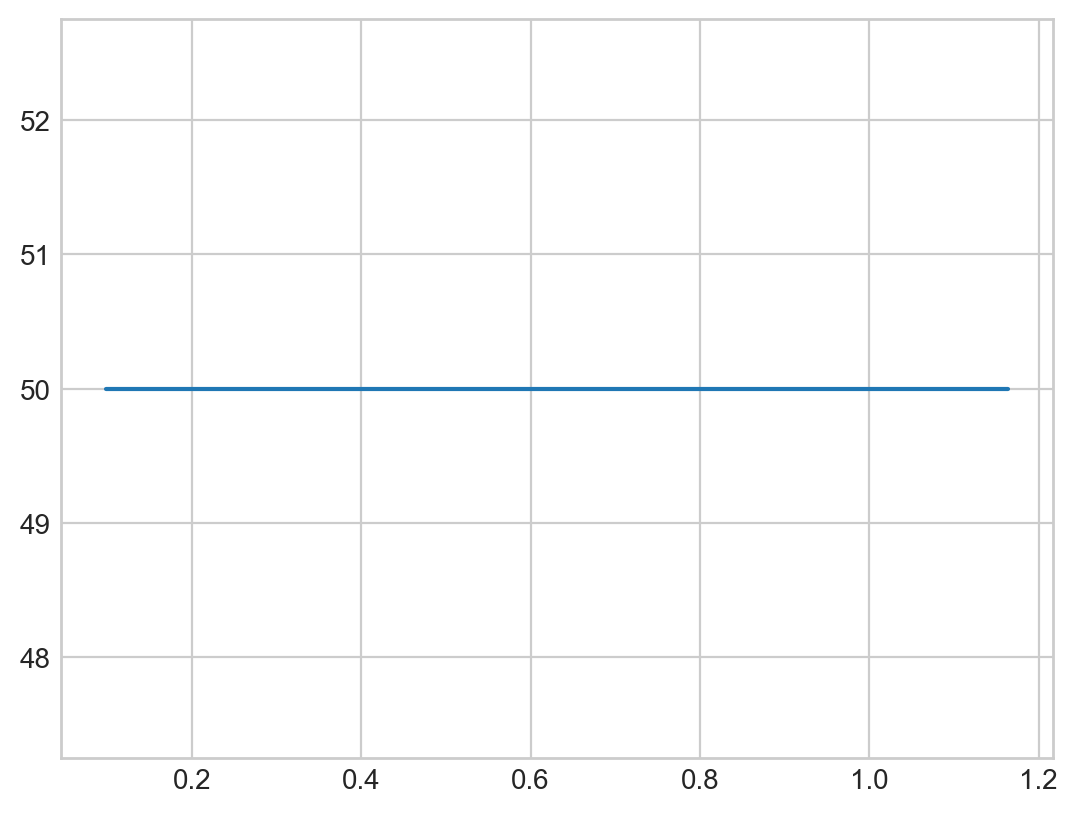

In [219]:
threshold_Bfield=np.ones(len(s[:,0]))*50.0
plt.plot(s[:,0]/6371000.0,threshold_Bfield)

In [211]:
print(log10(Rem_min),log10(Rem_max))
print(log10(vconv_min),log10(vconv_max))
print(log10(Fconv_min),log10(Fconv_max))
print(log10(eta_min),log10(eta_max))
print(g_min,g_max)

-3.0 6.148838431271439
-7.0 0.055294097409742046
-7.0 6.1470895382238915
-7.0 37.81819664818557
2.386888010361425 13.242220218900355


In [218]:
axis_scale='linear'
T_min,T_max=f_axis_max_min(T_min,T_max,axis_scale)
print(T_min)
print(T_max)

-689.0750503233457
10896.164461581271


In [209]:
eta_min

0.0

Text(0.5, 0, 'Mass ($M_{\\oplus}$)')

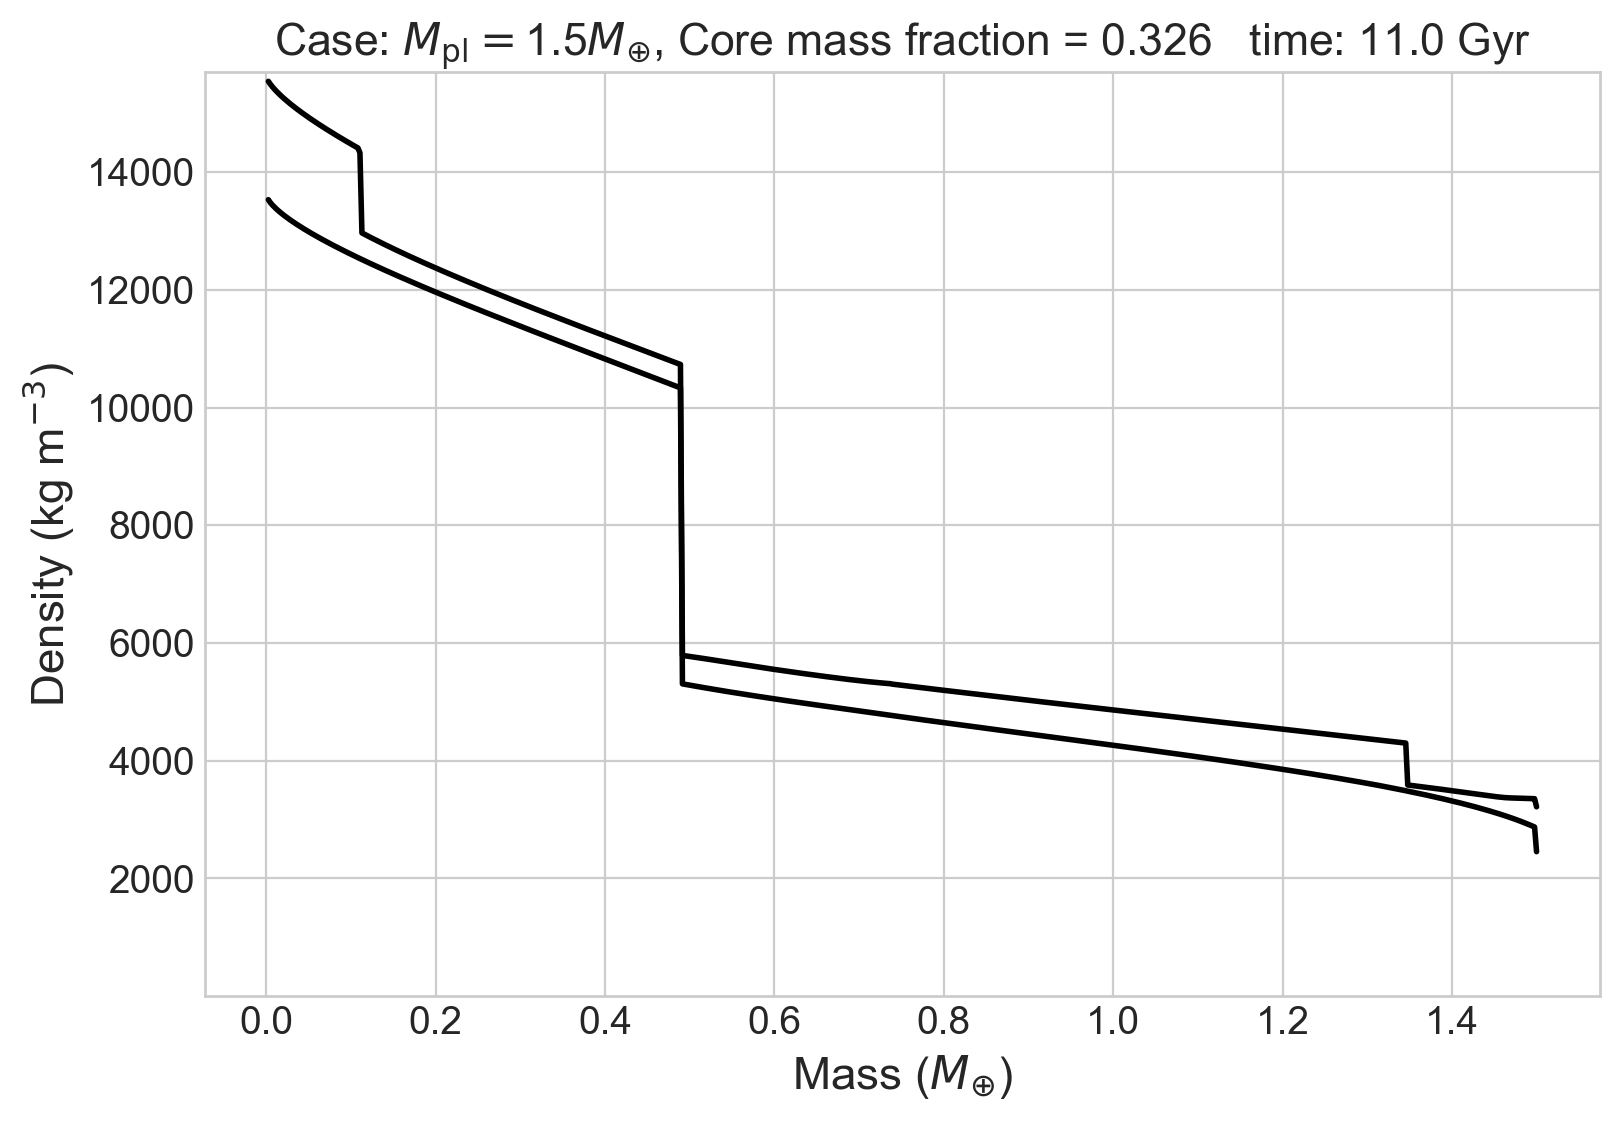

In [49]:
plt.figure(figsize=(9,6))
axis_scale='linear'
plt.plot(mass/5.972e24,s0[:,2],color='black',linewidth=2.0)
plt.plot(mass/5.972e24,sE[:,2],color='black',linewidth=2.0)
y_ni
plt.ylim(0.01,rho_max)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title('Case: '+r'$M_{\mathrm{pl}}= $'+str(load_file[0])+r'$ M_{\oplus}$, Core mass fraction = '+str(load_file[1])+'   '+t_title[i] ,fontsize=16)
plt.ylabel(r'Density (kg m$^{-3}$)',fontsize=16.5)
plt.xlabel(r'Mass ($M_{\oplus}$)',fontsize=16.5)


In [183]:
evo=np.loadtxt(results_foldername+'/evolution_old.txt')

Text(0.5, 1.0, '$M_{\\mathrm{pl}}= $1.5$ M_{\\oplus}$, Core mass fraction = 0.326')

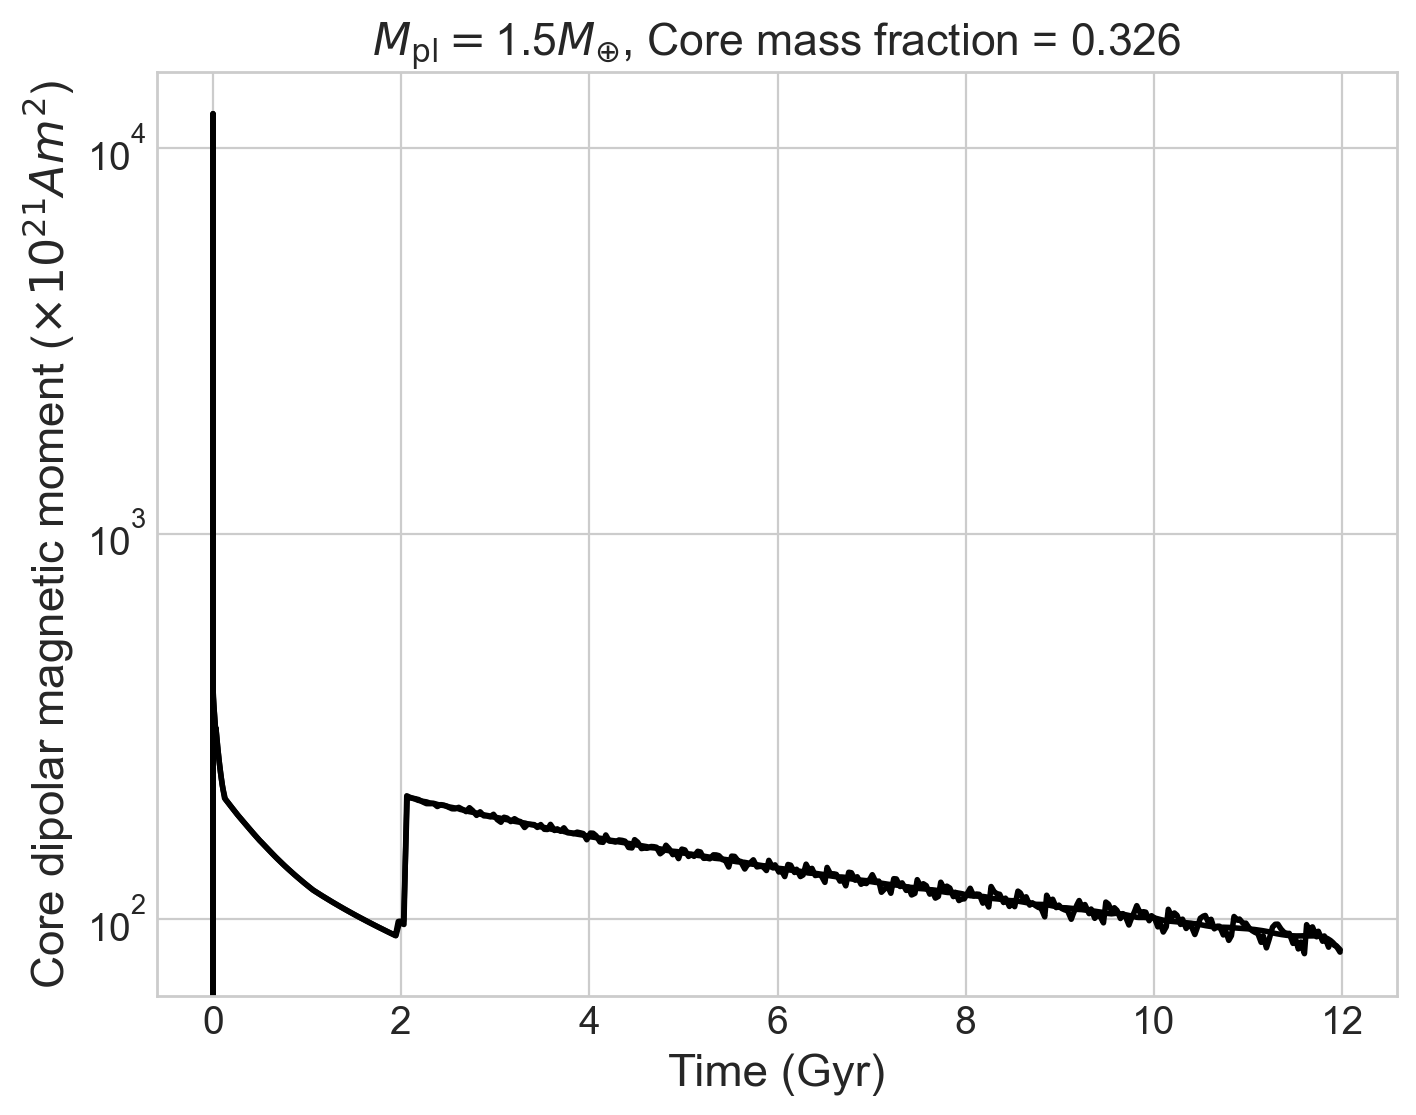

In [184]:
plt.figure(figsize=(8,6))
plt.plot(evo[:,0]/1e9/86400.0/365.0,evo[:,22]/1e21,color='black',linewidth=2.0)
plt.plot(evp[:,0]/1e9/86400.0/365.0,evp[:,22]/1e21,color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.yscale('log')
plt.ylabel(r'Core dipolar magnetic moment ($\times 10^{21} Am^2$)',fontsize=16.5)
plt.xlabel('Time (Gyr)',fontsize=16.5)
plt.title(r'$M_{\mathrm{pl}}= $'+str(load_file[0])+r'$ M_{\oplus}$, Core mass fraction = '+str(load_file[1]) ,fontsize=16)

In [147]:
from scipy.signal import savgol_filter

# Sample data
x = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1])

# Apply the filter
y = savgol_filter(x, window_length=5, polyorder=2) 

print(y)


[1.         2.         3.         4.17142857 4.65714286 4.17142857
 3.         2.         1.        ]


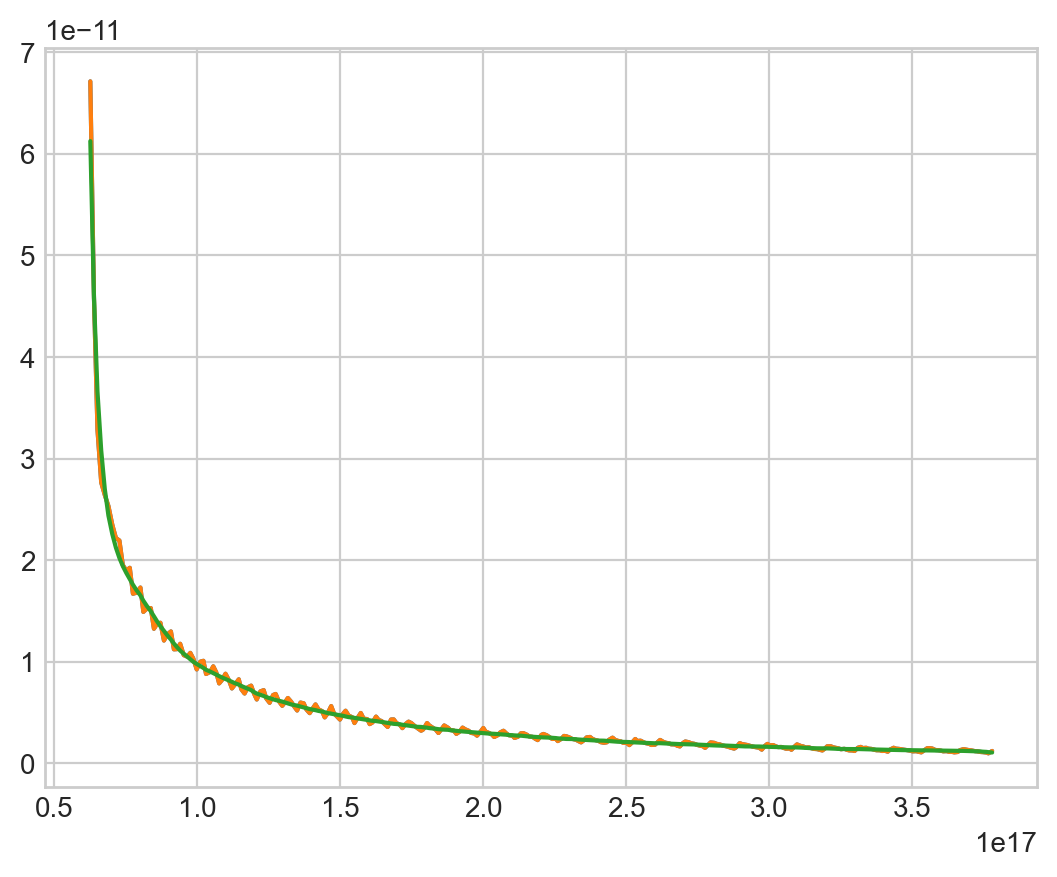

In [169]:
#plt.yscale('log')
Ric_t=CubicSpline(evo[:,0][start_ind:].tolist(),evo[:,14][start_ind:].tolist())
dRicdt=Ric_t.derivative()
plot(evo[:,0][start_ind:],dRicdt(evo[:,0][start_ind:]))
y=np.log10((dRicdt(evo[:,0][start_ind:])).tolist())
y_hat=savgol_filter(y.tolist(), window_length=99,polyorder=9) 
plot(evo[:,0][start_ind:],10.0**y)
plot(evo[:,0][start_ind:],10.0**y_hat)

In [171]:
Ric

array([      0.        ,       0.        ,       0.        , ...,
       2241998.44089285, 2242648.1914787 , 2244024.6891484 ])

In [252]:
## I use the next two cells to figure out how to speed up plotting.

import matplotlib.style as mplstyle
import time

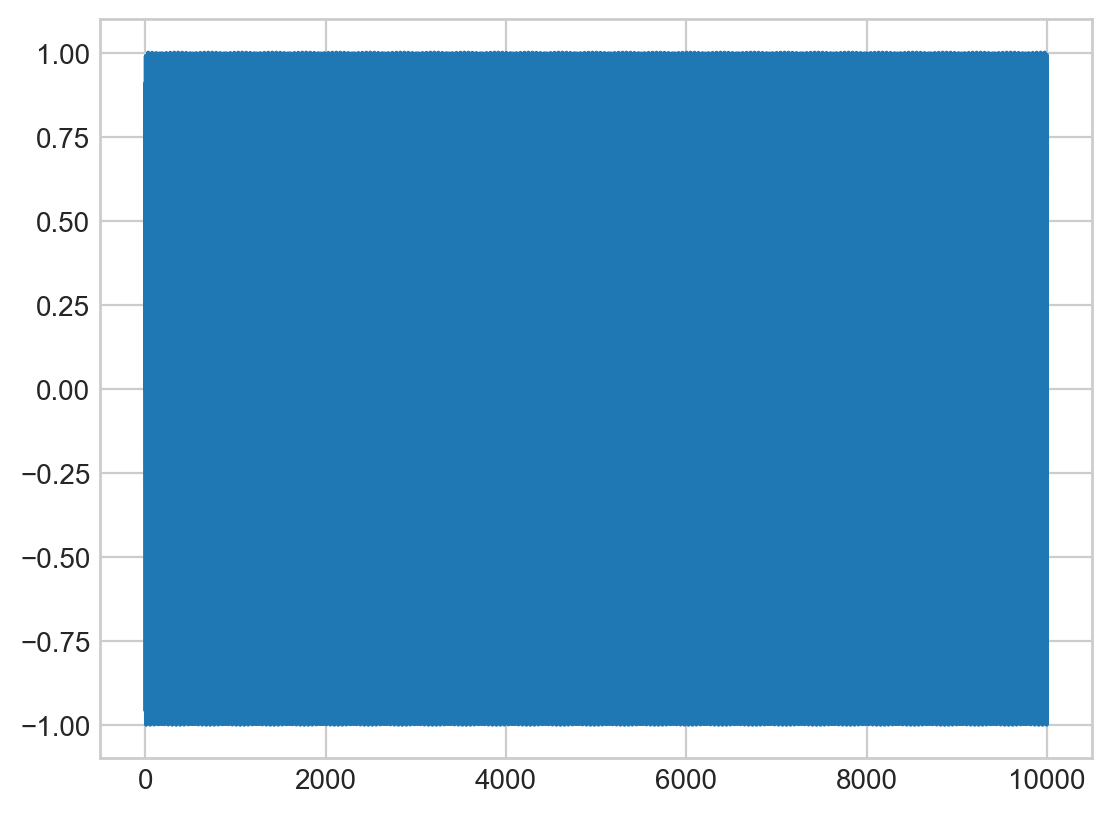

In [250]:
x = np.arange(0, 10000, 1)
y = np.sin(x)

while i
# Plot the data
plt.plot(x, y)


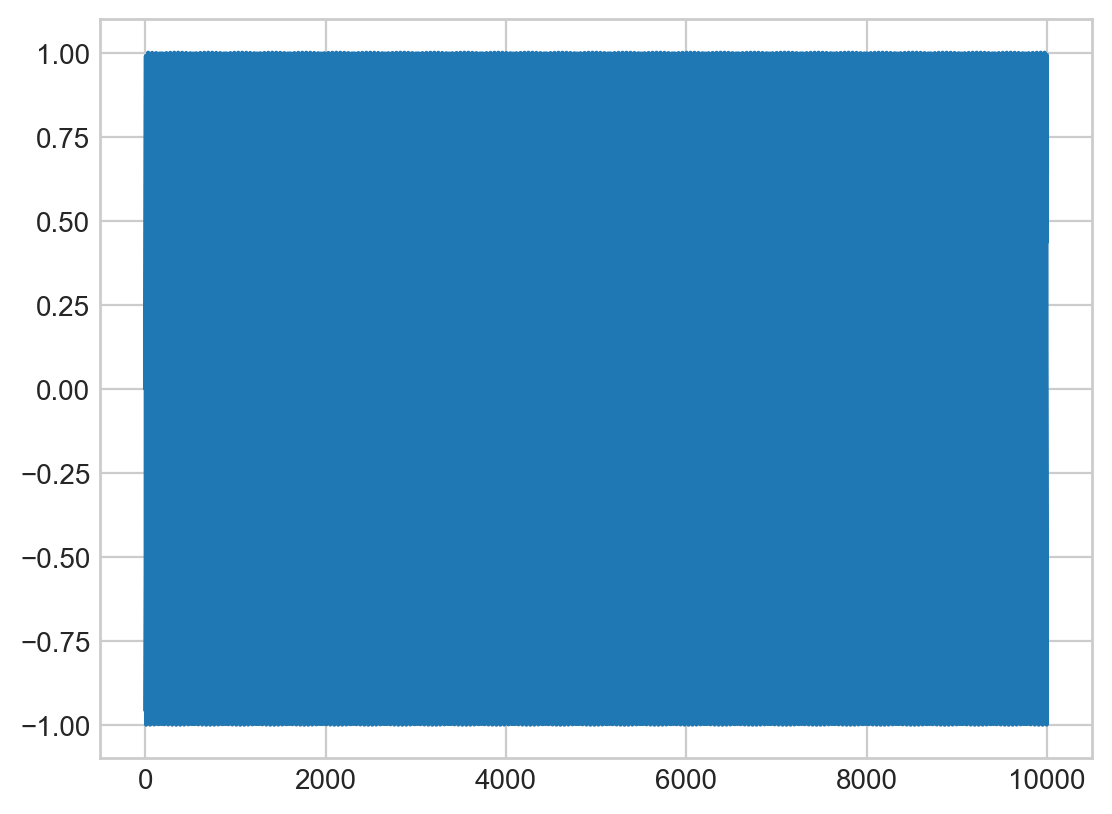

In [251]:
mplstyle.use('fast')
plt.plot(x, y)

In [4]:
evo=np.loadtxt('results/evolution.txt')
# index  variable  #### everything is in SI units
# 0       t
# 1       dt
# 2       average mantle specific entropy
# 3       average mantle temperature
# 4       average core temperature 
# 5       surface temperature
# 6       core mantle boundary (CMB) temperature
# 7       surface heat flux
# 8       CMB flux
# 9       Conductive flux along core adiabat (threshold flux for thermal convection in liquid core)
# 10      Planet radius
# 11      Core radius
# 12      Central pressure
# 13      CMB pressure

## pick values for i_x and i_y in the following boxes to set x and y-axis to plot thermal history of the planet

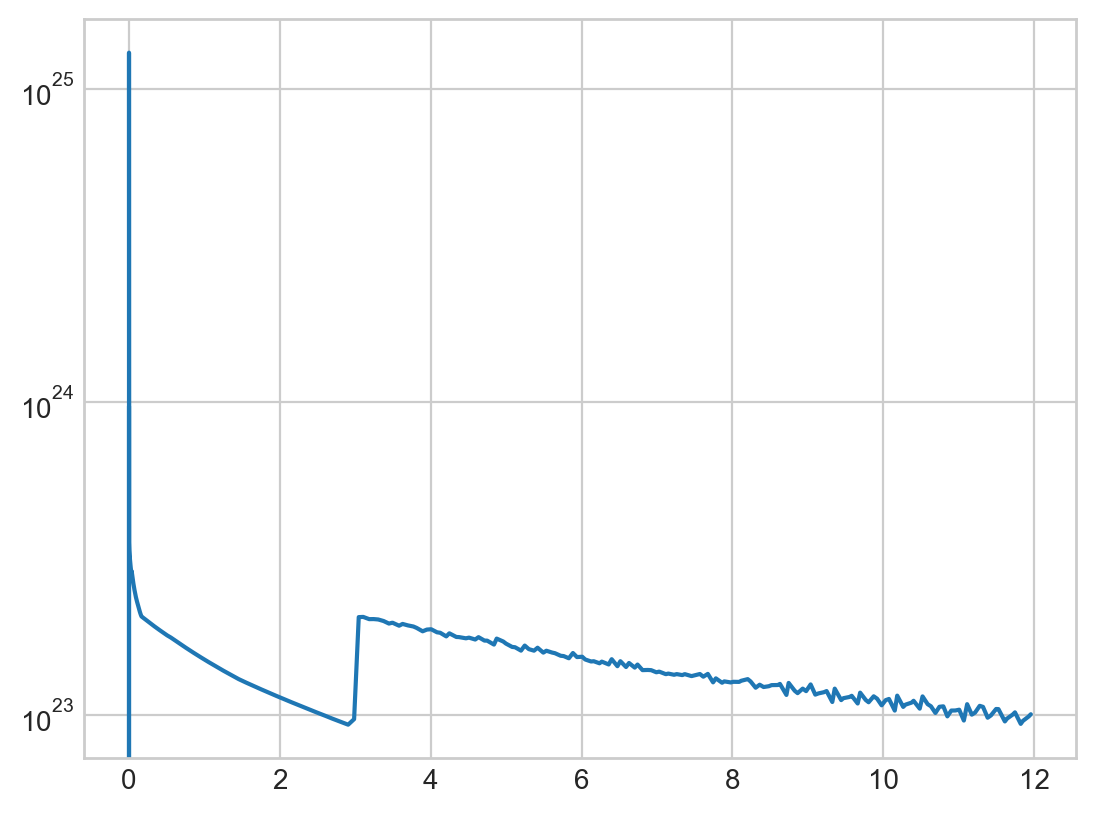

In [6]:
i_x=0
i_y=-1
plt.yscale('log')
plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y])

Text(0.5, 0, 'Gyr')

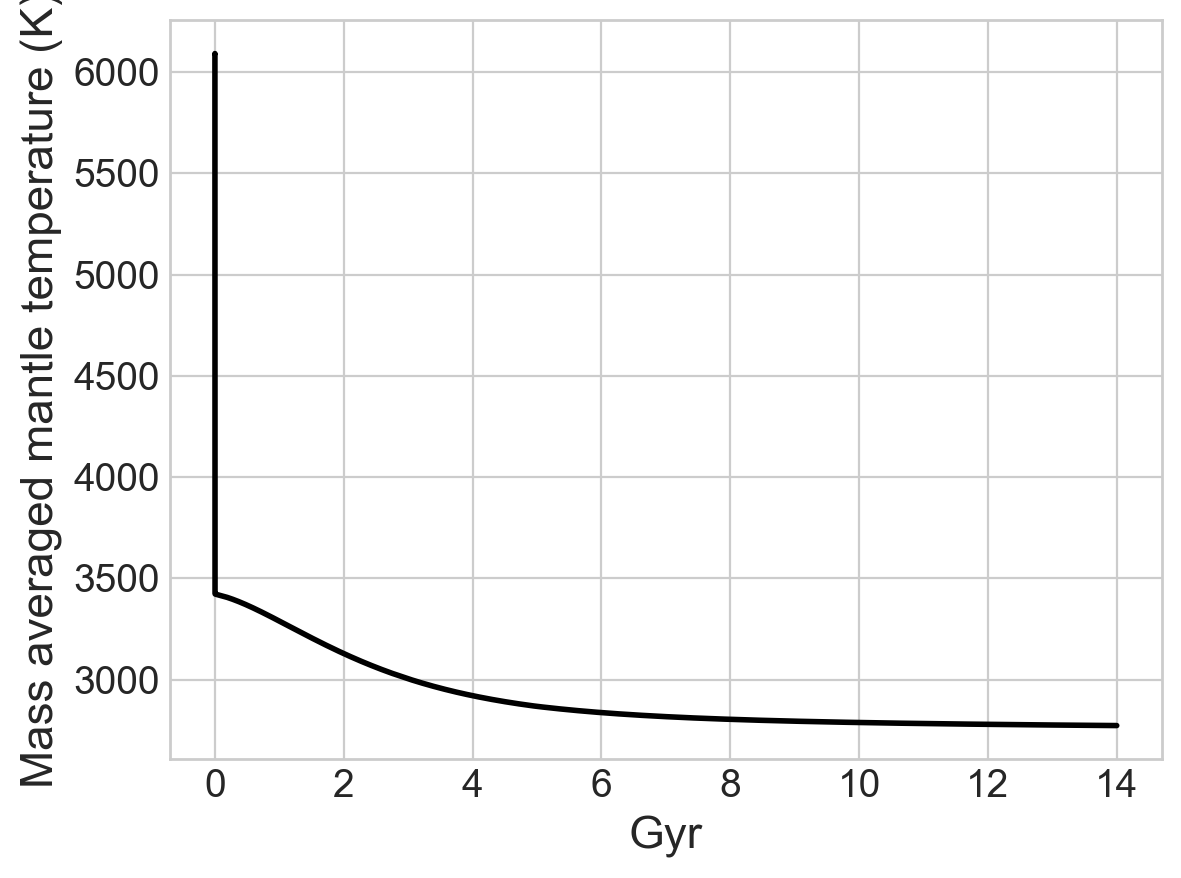

In [6]:
i_x=0
i_y=3
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y],color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Mass averaged mantle temperature (K)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 

Text(0.5, 0, 'Gyr')

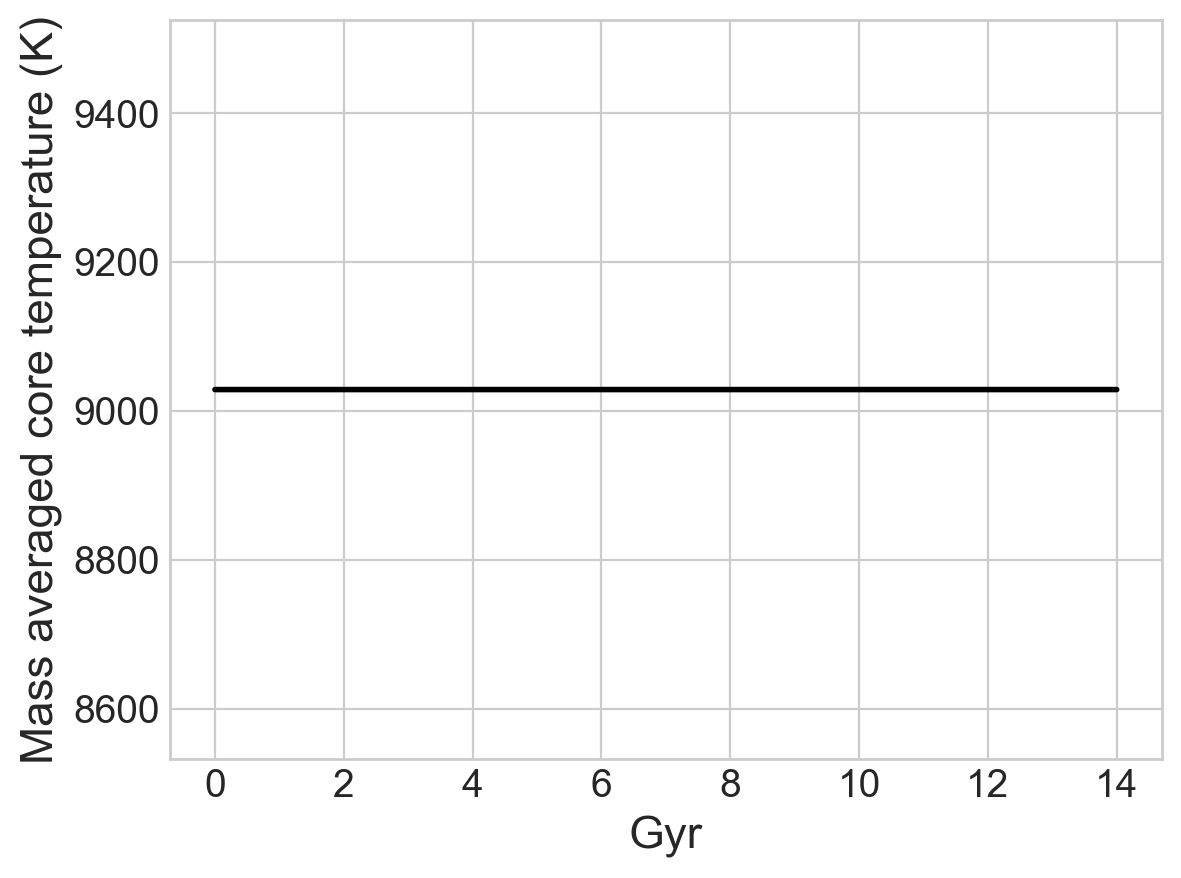

In [7]:
i_x=0
i_y=4
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y],color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Mass averaged core temperature (K)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 

Text(0.5, 0, 'Gyr')

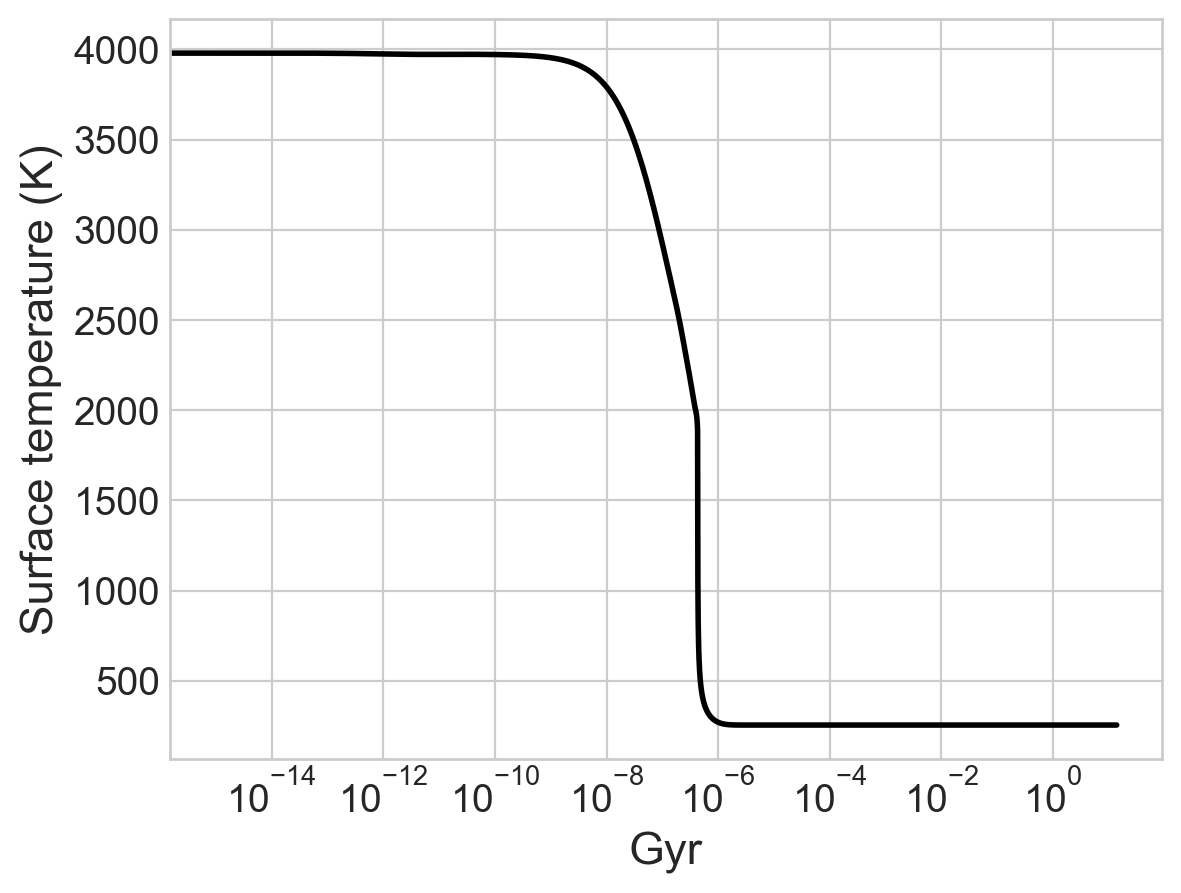

In [48]:
i_x=0
i_y=5
plt.xscale('log')
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y],color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Surface temperature (K)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 

Text(0.5, 0, 'Gyr')

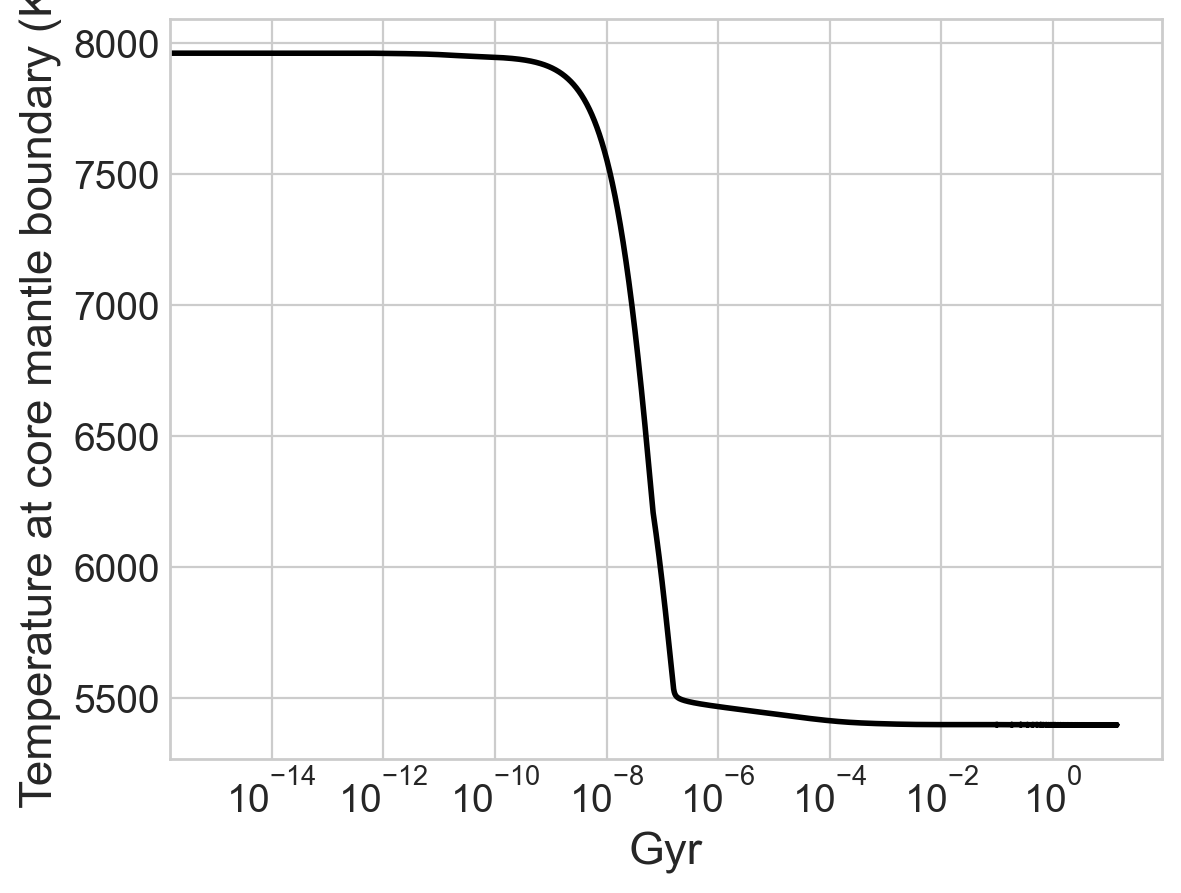

In [12]:
i_x=0
i_y=6
plt.xscale('log')
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y],color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Temperature at core mantle boundary (K)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 

Text(0.5, 0, 'Gyr')

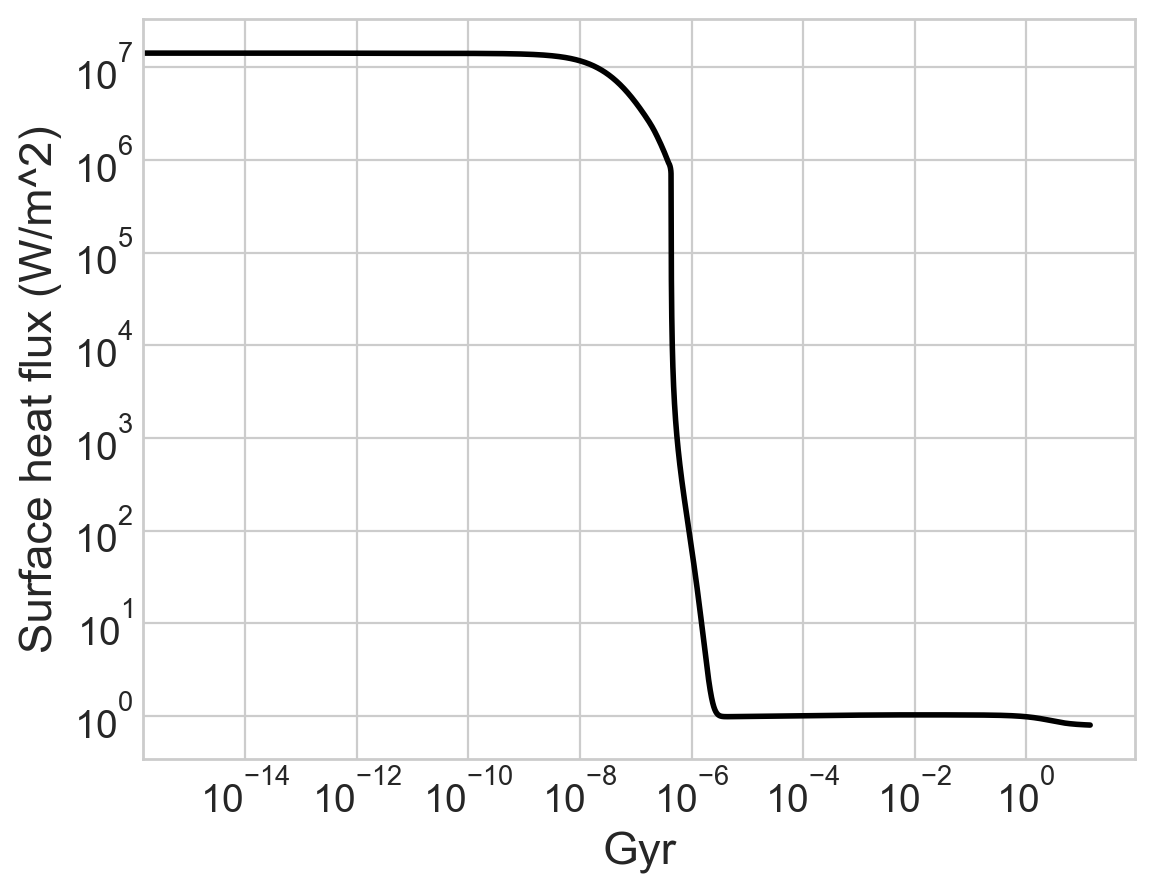

In [16]:
i_x=0
i_y=7
plt.xscale('log')
plt.yscale('log')
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y],color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Surface heat flux (W/m^2)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 

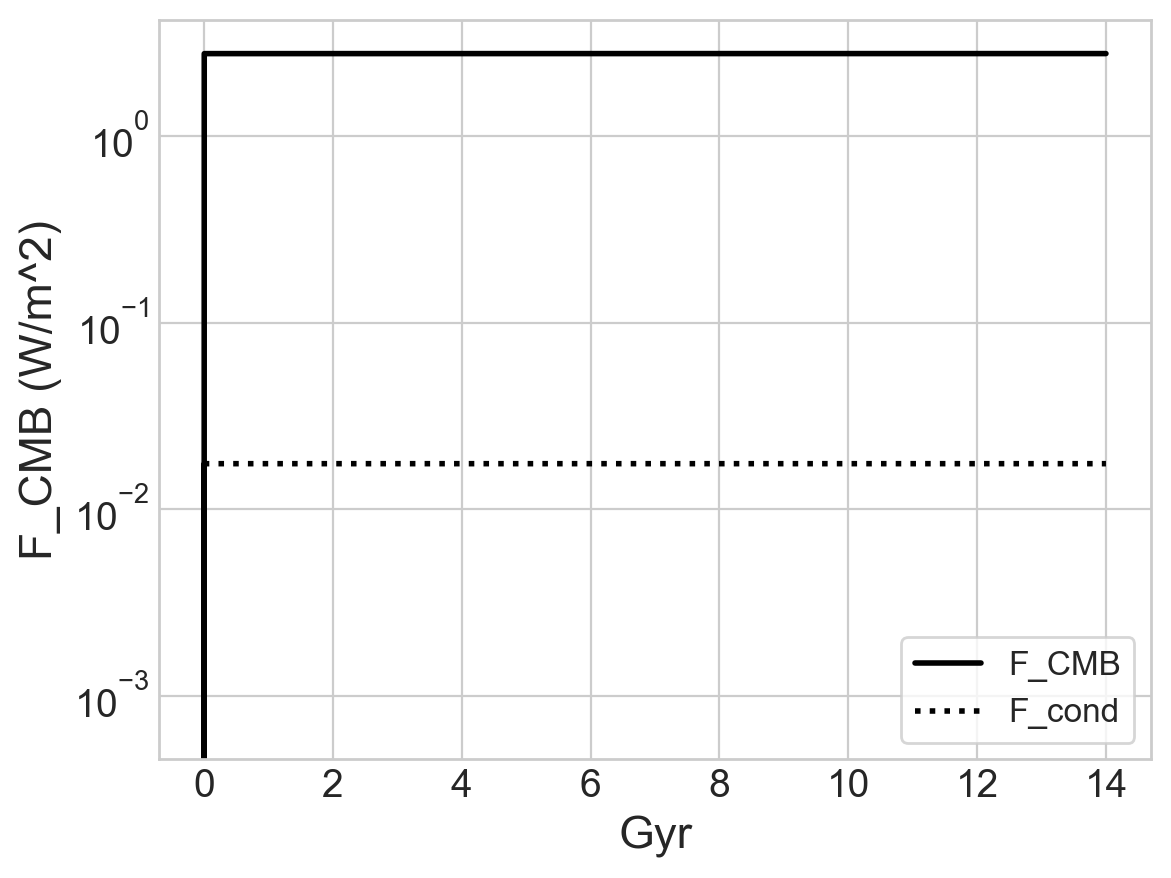

In [19]:
i_x=0
i_y=8
plt.yscale('log')
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y],color='black',linewidth=2.0,label='F_CMB')
i_y=9
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y],color='black',linewidth=2.0,linestyle=':',label='F_cond')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('F_CMB (W/m^2)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 
plt.legend(frameon=True, fontsize=12)

Text(0.5, 0, 'Gyr')

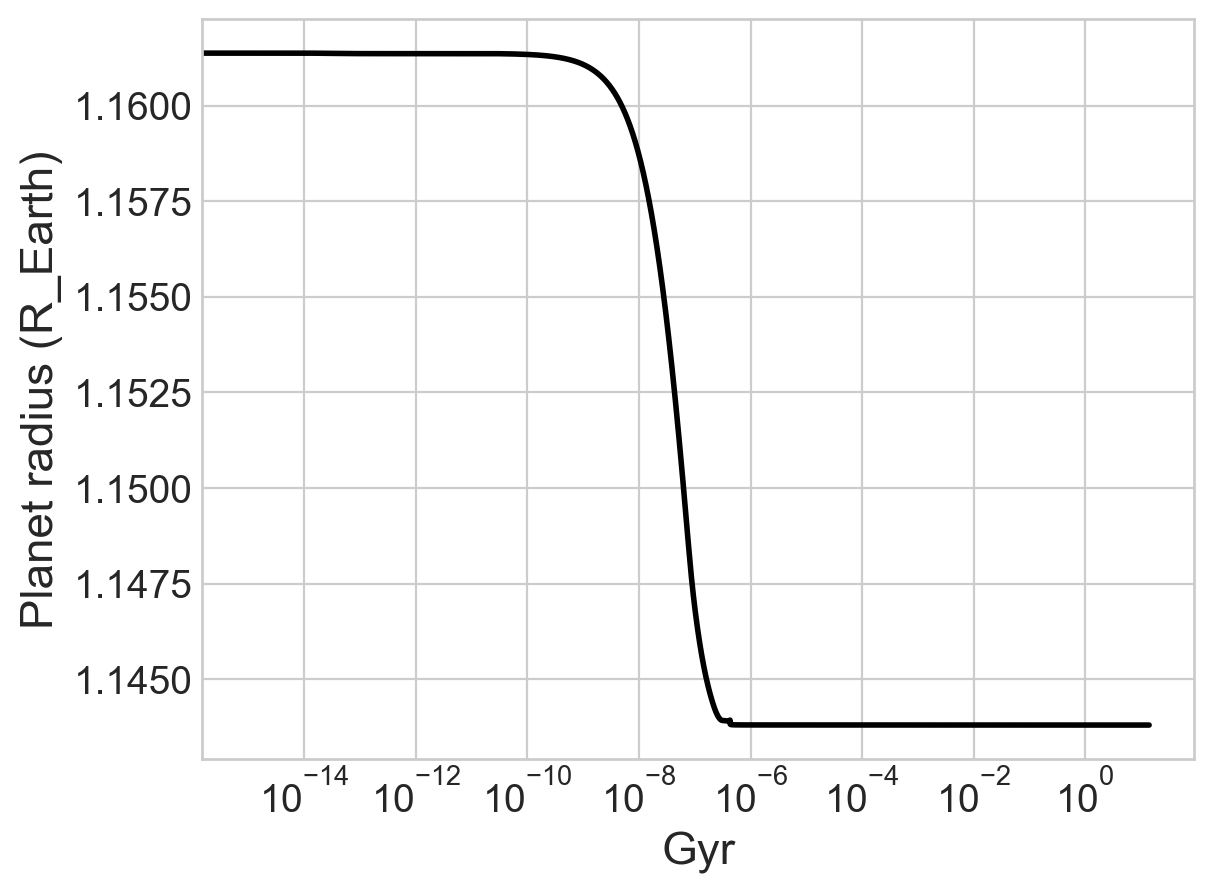

In [21]:
i_x=0
i_y=10
plt.xscale('log')
#plt.yscale('log')
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y]/6371000.0,color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Planet radius (R_Earth)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 

Text(0.5, 0, 'Gyr')

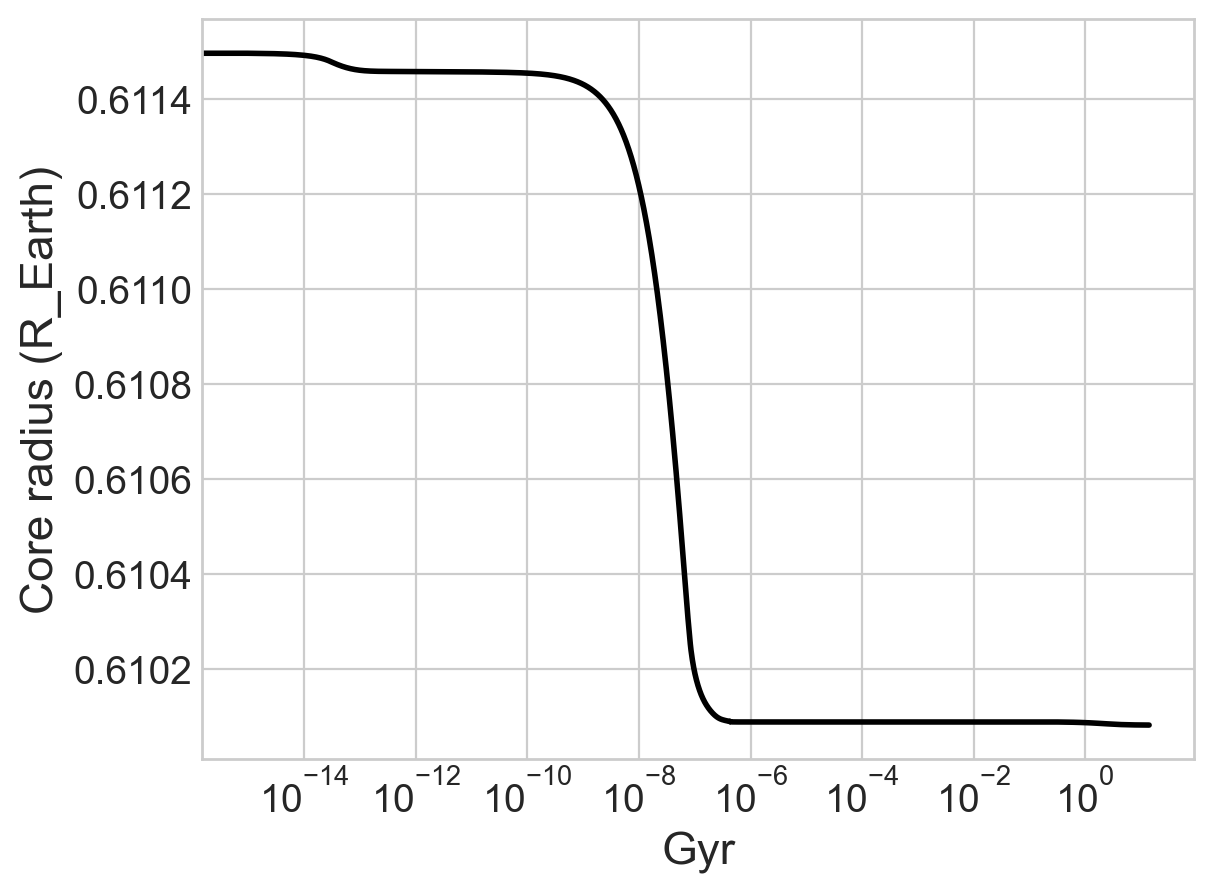

In [22]:
i_x=0
i_y=11
plt.xscale('log')
#plt.yscale('log')
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y]/6371000.0,color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Core radius (R_Earth)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 

Text(0.5, 0, 'Gyr')

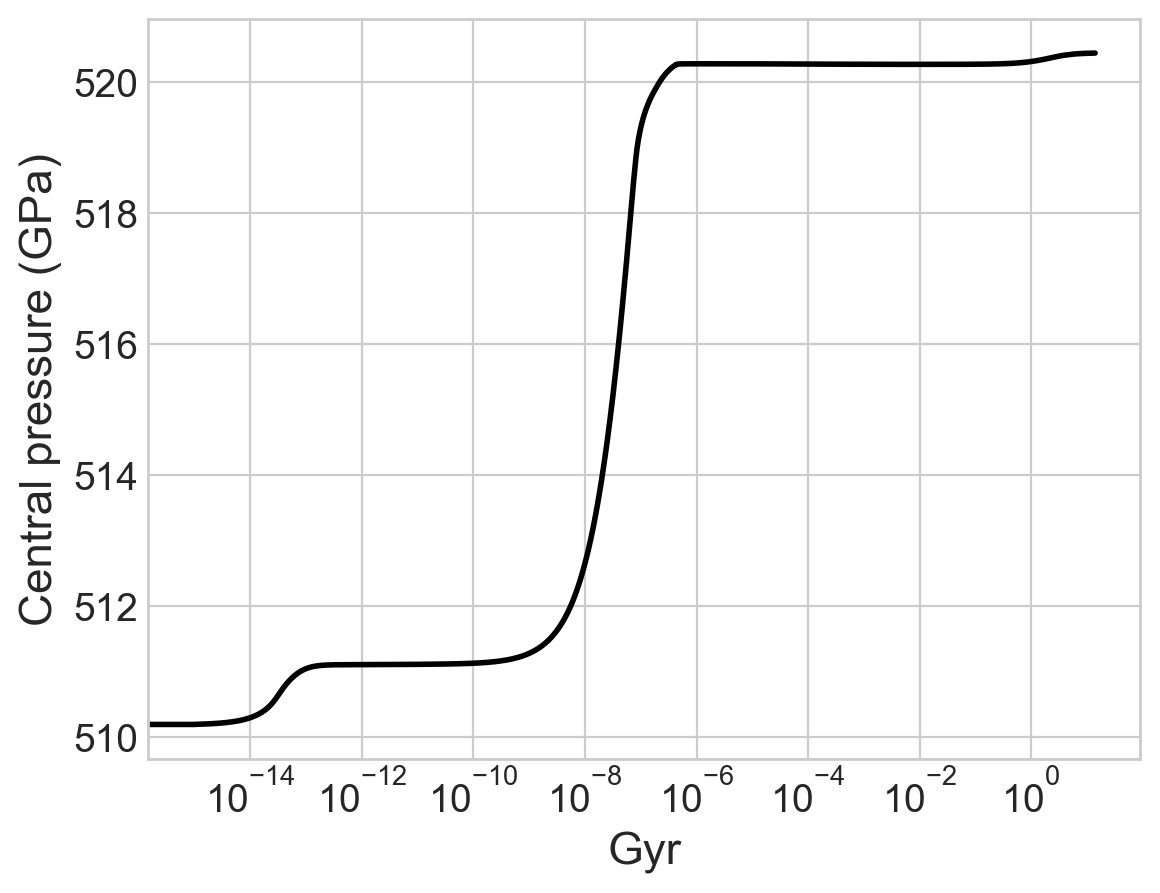

In [23]:
i_x=0
i_y=12
plt.xscale('log')
#plt.yscale('log')
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y]/1e9,color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('Central pressure (GPa)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 

Text(0.5, 0, 'Gyr')

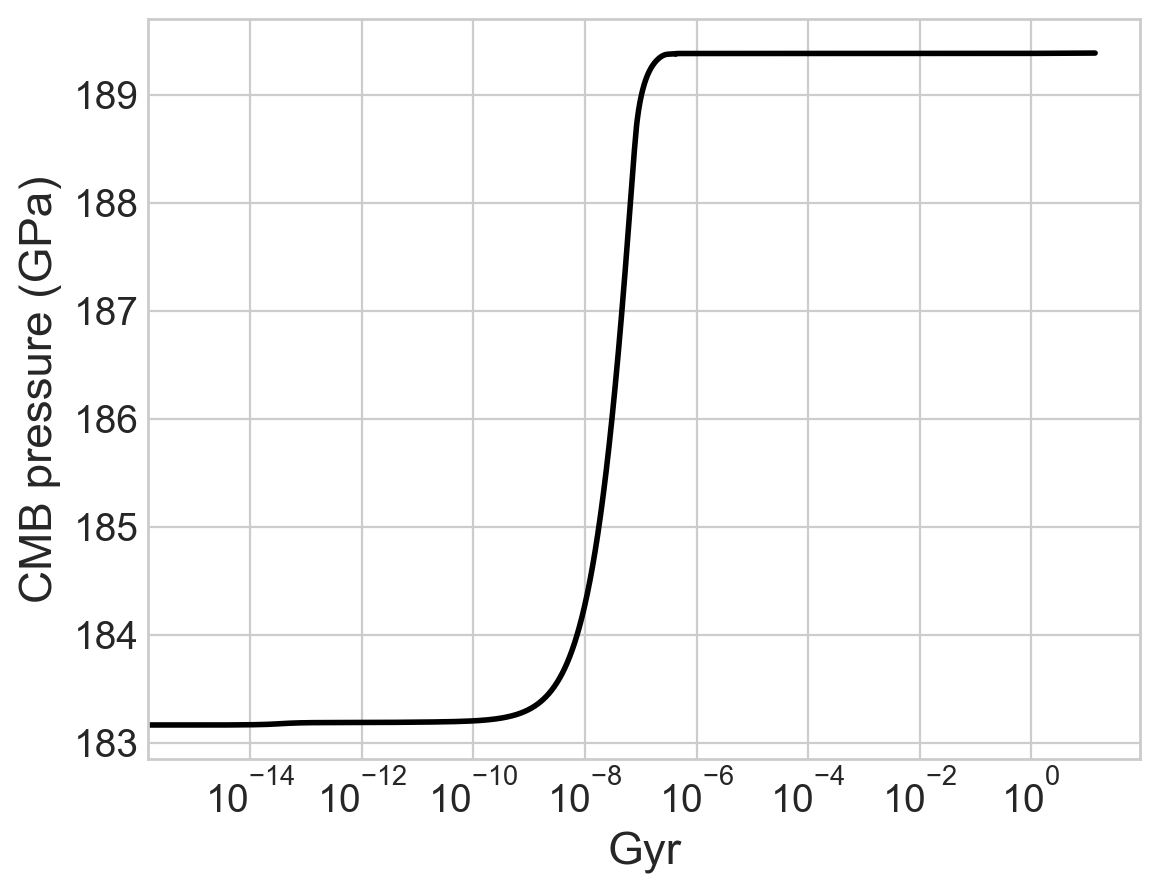

In [24]:
i_x=0
i_y=13
plt.xscale('log')
#plt.yscale('log')
plt.plot(evo[:,i_x]/1e9/86400.0/365.0,evo[:,i_y]/1e9,color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('CMB pressure (GPa)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 

In [25]:
# timesteps (years) for which profiles are saved

save_t=[1.0]
for i in range(1,1000):
    if save_t[i-1]<10000.0:
        save_t.append(save_t[i-1]+20.0)
    elif save_t[i-1]<1e8:
        save_t.append(save_t[i-1]+int(save_t[i-1]/20.0))
    else:
        save_t.append(save_t[i-1]+int(save_t[i-1]/50.0))

In [26]:
ind=500 # select a timestep out of save_t
s=np.loadtxt('results/profile/structure_'+str(int(save_t[ind]))+'.txt')
p=np.loadtxt('results/profile/property_'+str(int(save_t[ind]))+'.txt')

### everything is in SI units.
####### s file 
# index   variable
# 0       radius
# 1       pressure
# 2       temperature
# 3       density
# 4       gravity
# 5       mass
####### p file
# index   variable
# 0       thermal expansion coefficient 
# 1       specific heat
# 2       gravity
# 3       Convective flux in the mantle
# 4       Convective velocity in the mantle
# 5       Magnetic Reynolds number
# 6.      viscosity

# pick i_x and i_y and s/p files to set x and y-axis in the following boxes to plot thermal and structural profiles

Text(0.5, 0, 'Gyr')

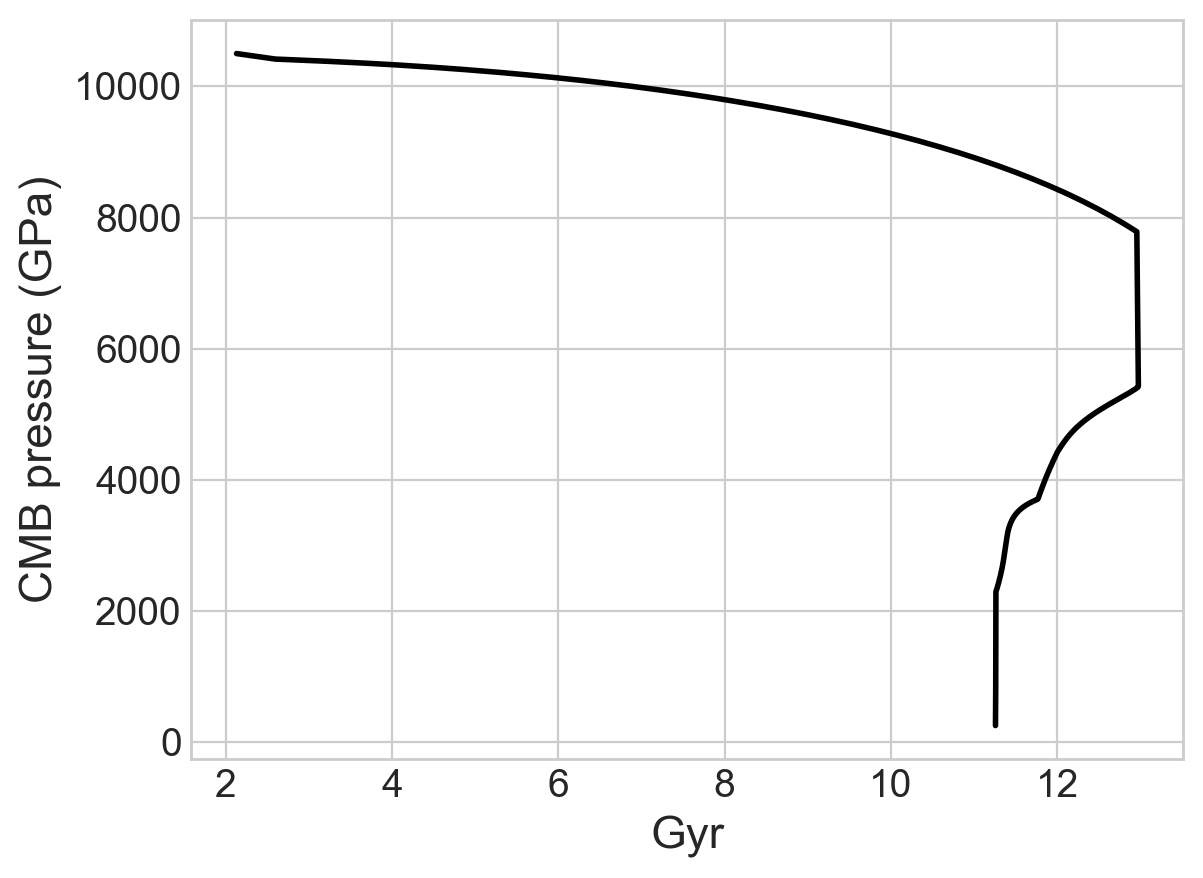

In [37]:
i_x=0
i_y=2
plt.plot(s[:,-1],s[:,i_y],color='black',linewidth=2.0)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel('CMB pressure (GPa)',fontsize=16.5)
plt.xlabel('Gyr',fontsize=16.5) 